
# Problem Set 1

## Q1. (Valuation of FinTech Innovation Activities)

If you just use the stock price response before and after a patent disclosure event to measure the
value of this patent, what are the potential limitations of this type of classical “event study” method?

Answer:
1. Can't be used for firms without public stock price data.
2. Requires more assumptions of the patent occurring process.
3. It doesn't capture value created outside of the “profitable” value.
4. Standard limitations of event study (i.e., other types of events could happen at the same time).


Can you calculate the corresponding bar Delta V based on the provided information?

Answer:

1. Expected Return = 2.47% + 1.12 * (-4.23%-2.47%) #TODO - RM kan inte va lägre än Rf???

If delta = 2, can you further calculate V* for this patent? (6 points) If this number looks too large
compared to the results in the paper, which part might go wrong here? #TODO

Can you please model the impact of COVID-19 variants in the future using the method taught in Lectures 2 and 3?

Answer:
* Let $V_0$ be the value of the global market without new covid variants
* Let $V^*$ be the incremental value of one new Covid variant to the global economy
* $N:$ the number of Covid variants that will occur during time internval (t, t+T)
* $I_t:$ the information set of market participants at time t
* $mV^*:$ the incremental value during time t+T if exactly m covid variants occur

Where the economic impact of one new covid variant can be moddeled by:
* $V^* = \frac{\Delta \overline V}{\frac{\lambda}{1-e^{-\lambda}}-\lambda}$, and if a new covid variant is introduced, the observed change to the market is given: $\Delta \overline V \equiv \overline V_1 - \overline V_0$




# Q2. (Robo-advising)

We learned about how Robo-advising affects Indian retailer investors. However, if you plan to study how Robo-advising affects Swedish retailer investors, how do you plan to study this question?

Answer:

Empirical Method: I would use a randomized control trial to study how Robo-advising affects Swedish retailer investors. In an RCT, I would  randomly assign participants to either a treatment group or a control group, with the treatment group receiving the Robo-advising service and the control group not receiving it. I would also make sure that the participants are of the same financial literacy, and have equal financial resources at their disposal. The outcomes of interest, such as investment returns, risk tolerance, or trading behavior, would then be  compared between the two groups to determine the impact of Robo-advising.

Advantages of this method:
Causal Inference: RCTs allow for strong causal inference as they control for potential factors that could influence the outcomes of interest. By randomly assigning participants to treatment and control groups, any observed differences in outcomes can be attributed to the Robo-advising service. Especially if we control for the most important variables I mentioned above. Furthermore, RCTs have high internal validity as they are designed to eliminate sources of bias that could affect the results. This makes it more likely that the observed effects are a true representation of the impact of Robo-advising on Swedish retailer investors.

Potential Limitations:
RCTs may have limited external validity as they often involve a specific population and context that may not be representative of other populations or contexts. Therefore, the results may not be generalizable to all Swedish retailer investors. RCTs also be can be time-consuming and costly to conduct, especially if a large sample size is required. The recruitment of participants, data collection, and analysis all require significant resources and coordination.


Based on your understanding of Swedish retailer investors, can you propose a different/new story about how Swedish investors might be affected by Robo-advising?

Answer:

Swedish investors tend to have a strong preference for socially responsible investing and are often willing to pay a premium for companies that have strong environmental, social, and governance (ESG) practices - but for many it is difficult to internalize and compare the sustainability ratings of different options. With the help of Robo-advising, Swedish retail investors might be more likely to invest in ESG funds that align with their values and beliefs.

# Q3. (P2P and Machine Learning) 25 points

C:\Users\MaxJunestrand\AppData\Local\Temp\ipykernel_25288\3214279747.py:5: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2017.csv')


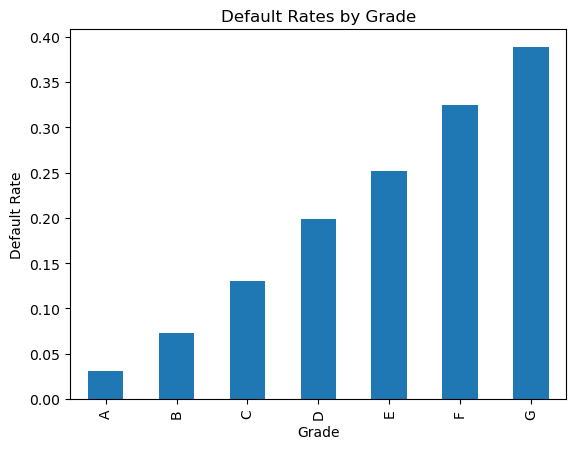

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# read loan_data_2017 file into a pandas dataframe
df = pd.read_csv('loan_data_2017.csv')

# calculate default rate for each grade category
default_rates = df.groupby('grade')['loan_status'].apply(lambda x: (x=='Charged Off').sum() / len(x))

# plot bar graph
default_rates.plot(kind='bar')
plt.title('Default Rates by Grade')
plt.xlabel('Grade')
plt.ylabel('Default Rate')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Splitting the data into 30% test and 70% train
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42) # this is equivilant to "sample command"


The selected features include loan amount, term, interest rate, installment, employment length, home ownership, annual income, verification status, loan purpose, debt-to-income ratio, number of delinquencies in the past 2 years, total number of credit lines, initial listing status, number of inquiries in the last 6 months, number of open credit lines, and number of public record.

I selected these features based on their potential impact on the target variable and their availability in the dataset. For example, the loan amount, term, interest rate, and installment are key factors that determine the borrower's ability to repay the loan. Employment length and annual income are good indicators of the persons financial stability and capacity to make payments. Home ownership, verification status, and loan purpose provide even more information about the borrower's financial situation, and how they plan to use the money n. Debt-to-income ratio, delinquencies, and credit utilization rate reflect the borrower's creditworthiness and are thus good predictors of risk of default. Finally, the number of inquiries, open credit lines, and public records are indicators of the borrower's credit history and financial responsibility - and history will always be a good predictor for the future!

In [42]:
from sklearn.preprocessing import LabelEncoder

df = df.fillna(0) # fill missing values with 0

# select the features to use for prediction
features = ["loan_amnt", "term", "int_rate", "installment", "home_ownership", "annual_inc", "verification_status", "purpose", "dti", "delinq_2yrs", "revol_util", "total_acc", "initial_list_status", "inq_last_6mths", "open_acc", "pub_rec"]

df["int_rate"] = df["int_rate"].astype(str)
df["int_rate"] = df["int_rate"].apply(lambda x: float(x.strip().replace('%', '')))

df["revol_util"] = df["revol_util"].astype(str)
df["revol_util"] = df["revol_util"].apply(lambda x: float(x.strip().replace('%', '')))

# binary target for good / bad 
df["target"] = (df["grade"].isin(["A", "B"])).astype(int)

categorical_features = ['term', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Use get_dummies to create one-hot encodings for the categorical features
data = pd.get_dummies(df, columns=categorical_features)


# I redo this step because I want the labels for target too.
train_data, test_data, train_labels, test_labels = train_test_split(df[features], df["target"], test_size=0.3, random_state=42)

In [41]:
# simple model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# train a logistic regression model
model = LogisticRegression()
model.fit(train_data, train_labels)

# make predictions on the test set
test_pred = model.predict(test_data)

# evaluate the model performance
print("Accuracy:", accuracy_score(test_labels, test_pred))
print("Precision:", precision_score(test_labels, test_pred))
print("Recall:", recall_score(test_labels, test_pred))

Accuracy: 0.7724500211616501
Precision: 0.8129744651483782
Recall: 0.7059528565721135


c:\Users\MaxJunestrand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# And with a more fancy ML model we can get AWESOME results ;)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# train a random forest classifier model
model = RandomForestClassifier(n_estimators=100)
model.fit(train_data, train_labels)

# make predictions on the test set
test_pred = model.predict(test_data)

# evaluate the model performance
print("Accuracy:", accuracy_score(test_labels, test_pred))
print("Precision:", precision_score(test_labels, test_pred))
print("Recall:", recall_score(test_labels, test_pred))

Accuracy: 0.9998506236462767
Precision: 0.999700449326011
Recall: 1.0


# Q4. (Feedback Effect) 15 points

The paper defines the "Feedback effect" as: how companies adjust the way they talk knowing that machines are listening.

For the second part, I'd like to discuss two other examples:
1. Credit Scoring Algorithms: When lending, credit scoring algorithms are increasingly being used to determine whether or not someone is eligible for a loan. As these algorithms scale and process large amounts of data, they can pick up on certain patterns and biases. In relation to the feedback effect, we can think about how people might interact online and with their devices differently when they know a machine is listening. For instance in China, much of people's activity online is baked into algorithms that determine credit score.
2. Trading Algorithms: In high-frequency trading, trading algorithms are used to analyze market data and make trades in a matter of milliseconds. However, the presence of these machine learning algorithms in the market can create a feedback effect. With the knowledge that ML systems make a lot of trades, companies with other ML systems, or human traders will undoubtly interact with the market differently. We might even end up in a cycle where the ML algorithms' decisions are influenced by their own impact on the market, creating a feedback loop that can be difficult to predict or control.

# Q5. (FinTech and Labor Market)

Alright, let's consider the field of financial research and analysis, which is a highly specialized and technical domain that requires a high education and many skills. Historically, financial research and analysis have been performed by human analysts. They analyze data, create financial models, and provide insights and recommendations to investors and financial institutions. A lot of their time is spent collecting data, crunching it and presenting in in e.g, a deck.

However, with the advent of FinTech and more powerful models. More and more financial research and analysis is being performed by ML algorithms and broader AI systems. These systems can collect data independently, process vast amounts of financial data and quickly identify trends, patterns, and opportunities that human analysts might miss. They are even capable enough to put together the findings in a power point deck.

As a result, highly educated individuals who work in financial research and analysis could face competition from FinTech systems. This could lead to job losses or a shift in job responsibilities, as companies start relying more on tools over analysts to analyze financial data.

(second part) To avoid being disrupted by FinTech, Felix could focus on developing skills and expertise that are less likely to be automated. For example, he could focus on developing soft skills such as communication, leadership, and critical thinking, as these are skills that machines are not yet able to replicate. Additionally I would recommend him to stay up-to-date with the latest developments in technology and explore ways that he can incorporate these technologies into his work to increase efficiency and productivity. So that he can adopt these tools and not be replaced by them - and by doing so Felix can increase the chances of ensuring that his job remains secure and fulfilling for years to come.